# Marketing Case Study

This data is from a retail food company, serving nearly one million cusomuers a year. They sell products from five major categories: wine, rare meat products, exotic fruits, specially prepared fish, and sweet products.

This company has three sales channels for consumers to acquire products: physical stores, catalogues, and the company's website. The company has solid revenues and a healthy bottom line in the last three years, but the profit growth perspectives for the next three years are not as promising. One strategic initiative is to improve the performance of marketing activities with a focus on marketing campaigns.

## Data Exploration

A key objective of data exploration is to provide a better understanding of the characteristic features of respondents.

A second key objective of data exploration is to provide and describe a customer segmentation based on customer behaviours.

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

In [143]:
# load data
with open("./data/marketing_data.csv", "r") as f:
    data = pd.read_csv(f)

data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [145]:
data.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
count,2240.000000,2240.000000,2240,2240,2216,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240
unique,NaN,NaN,5,8,1974,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
top,NaN,NaN,Graduation,Married,"$7,500.00",NaN,NaN,8/31/12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP
freq,NaN,NaN,1127,864,12,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095
mean,5592.159821,1968.805804,NaN,NaN,NaN,0.444196,0.506250,NaN,49.109375,303.935714,...,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,NaN
std,3246.662198,11.984069,NaN,NaN,NaN,0.538398,0.544538,NaN,28.962453,336.597393,...,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,NaN
min,0.000000,1893.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2828.250000,1959.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,5458.500000,1970.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,49.000000,173.500000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,8427.750000,1977.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,74.000000,504.250000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


### Check for duplicate rows

A person who's signed up may have lost access to their account for some reason and wish to sign up again. Here, we'll search for duplicate rows using the year_birth, marital status, education, and income columns.

In [146]:
# if we drop the id column and then check for duplicates
data.drop(columns=['ID'], inplace=True)

In [147]:
data.duplicated().value_counts()

False    2193
True       47
dtype: int64

In [148]:
data.drop_duplicates(inplace=True)
data.shape

(2193, 27)

### Data Cleanup

The income feature name has extra spaces and was classified as an object type.
Looking at the csv file also shows that the values contain an extra space at the end also.

In [149]:
# function to clean up income columns
def clean_income(df):
    df.rename(columns={" Income ":"Income"}, inplace=True)
    df['Income'] = df['Income'].str.replace("$","").str.replace(",","")
    df['Income'] = df['Income'].astype(float)
    return df

clean_income(data)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,...,6,1,0,0,0,0,0,1,0,SP
1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,...,7,5,0,0,0,0,1,1,0,CA
2,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,...,5,2,0,0,0,0,0,0,0,US
3,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,...,2,7,0,0,0,0,0,0,0,AUS
4,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,18,...,11,4,0,0,0,0,0,0,0,US
2236,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,10,...,3,8,0,0,0,0,0,0,0,SP
2237,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,2,...,5,8,0,0,0,0,0,0,0,SP
2238,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,38,...,10,3,0,0,0,0,0,0,0,IND


In [151]:
# fill in missing income values with the median
print("The number of null values:", data.Income.isnull().sum())
data['Income'] = data['Income'].fillna(data['Income'].median())
data['Income'].isna().sum()

The number of null values is:  24


0

This dataset contains 27 features and the target of response, which indicates whether or not the customer accepted the offer in the last campaign.

### Exploration of Features

This dataset contains various characteristics features of the customers, including:

Categorical
- Education (ordinal)
- Marital status (nominal)
- Country (nominal)

Numerical
- Year of birth (discrete)
- Dependents: Kidhome, Teenhome (discrete)
- Income (continuous)
- Dt_Customer (discrete)
- Complaints

date the customer enrolled with the company's loyalty program 

#### Graphing the categorical features

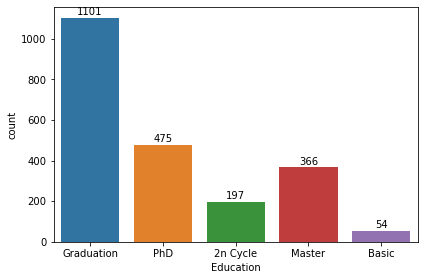

In [153]:
# Graph categorical features
fig, ax = plt.subplots(figsize = (6, 4))
sns.countplot(x = "Education", data=data)
for p in ax.containers:
    ax.bar_label(p, fmt='%.0f', label_type='edge', padding=1)
plt.tight_layout()
plt.show()

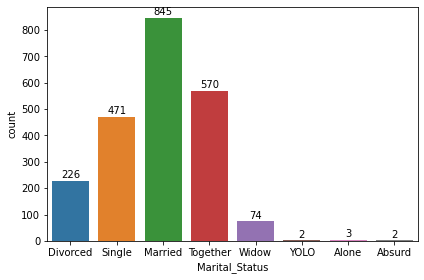

In [154]:
fig, ax = plt.subplots(figsize = (6, 4))
sns.countplot(x = "Marital_Status", data=data)
for p in ax.containers:
    ax.bar_label(p, fmt='%.0f', label_type='edge', padding=1)
plt.tight_layout()
plt.show()

There are some categories that could be grouped together in the marital status category.

In [155]:
def group_mstatus(df):
    '''Function to reduce the number of categories in marital status options.'''
    solo_status = ['YOLO', 'Alone', 'Absurd']
    df['Marital_Status'] = df['Marital_Status'].replace(solo_status, 'Single')
    together = ['Married', 'Together']
    df['Marital_Status'] = df['Marital_Status'].replace(together, 'Couple')
    return df

group_mstatus(data)
print(data.Marital_Status.unique())

['Divorced' 'Single' 'Couple' 'Widow']


In [156]:
# group by education and marital status
df_plot = data.groupby(['Marital_Status', 'Education']).size().unstack()
ed_cols = ['Basic', 'Graduation', 'Master', '2n Cycle', 'PhD']
df_plot = df_plot[ed_cols]
df_plot

Education,Basic,Graduation,Master,2n Cycle,PhD
Marital_Status,,,,,
Couple,34,704,242,132,303
Divorced,1,116,37,23,49
Single,18,248,75,37,100
Widow,1,33,12,5,23


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Couple'),
  Text(1, 0, 'Divorced'),
  Text(2, 0, 'Single'),
  Text(3, 0, 'Widow')])

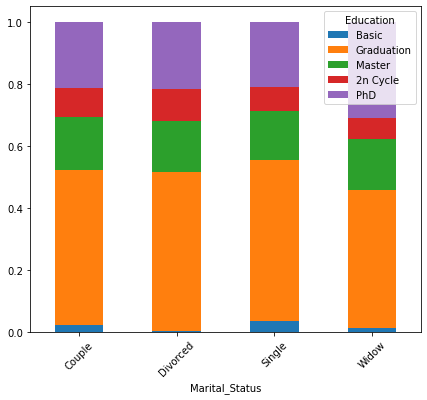

In [157]:
df_plot.apply(lambda x: x/x.sum(), axis=1).plot(kind = 'bar', stacked=True, figsize=(7,6))
plt.xticks(rotation = 45)

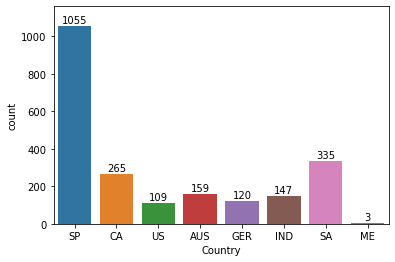

In [158]:
# plot country
fig, ax = plt.subplots(figsize = (6,4))
sns.countplot(x = 'Country', data=data)
for p in ax.containers:
    ax.bar_label(p, fmt='%.0f', label_type='edge', padding=1)
ax.margins(y=0.1)
plt.show()

Most customers are from the country Spain.

#### Distribution of Continuous variables

In [159]:
data_num = data.select_dtypes(include=np.number)

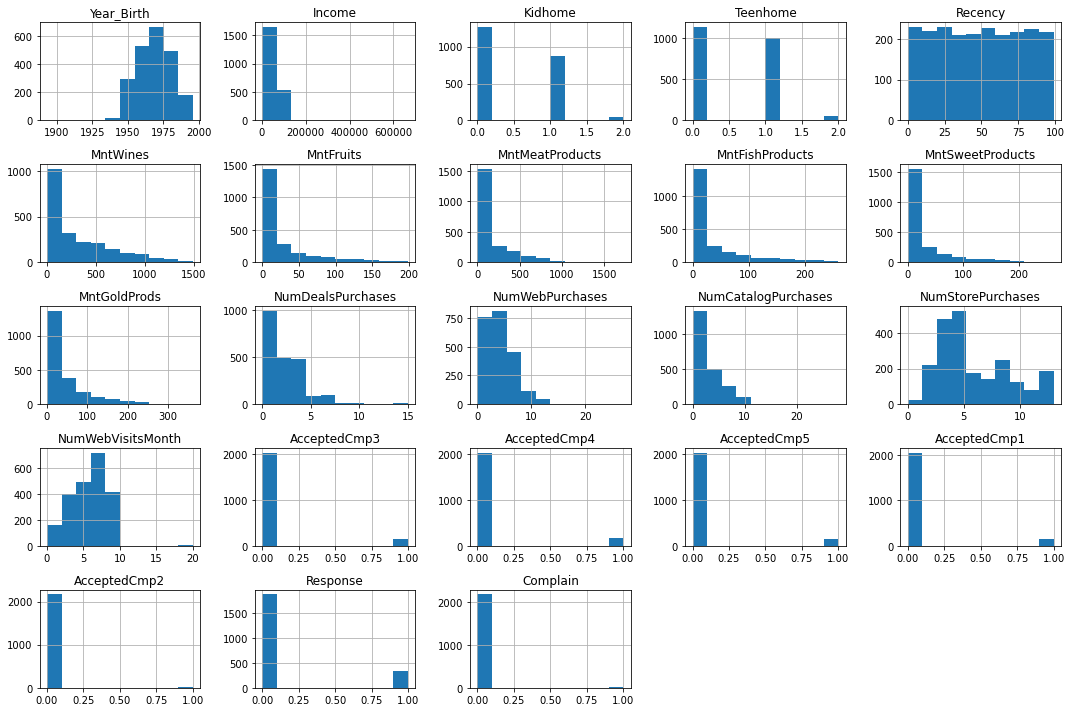

In [160]:
data_num.hist(figsize = (15, 10))
plt.tight_layout()
plt.show()

In [161]:
data_num.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,...,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000
mean,1968.779754,52275.255814,0.444140,0.506612,49.125855,304.152303,26.211126,167.314181,37.437301,27.037848,...,2.660283,5.784770,5.319197,0.072503,0.075239,0.073415,0.064751,0.013224,0.149567,0.009576
std,11.995943,25103.175746,0.538401,0.545450,29.001237,336.584764,39.618627,226.628559,54.628505,41.246123,...,2.923282,3.250099,2.424269,0.259379,0.263837,0.260877,0.246143,0.114258,0.356728,0.097409
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35682.000000,0.000000,0.000000,24.000000,23.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51411.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68274.000000,1.000000,1.000000,74.000000,505.000000,33.000000,230.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The year of birth and income appear to have some outliers.

### Income

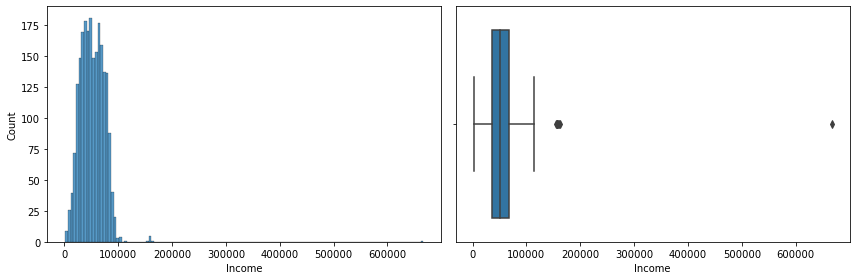

In [162]:
# plot income
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
sns.histplot(x = "Income", data=data, ax=ax[0])
sns.boxplot(x="Income", data=data, ax=ax[1])
plt.tight_layout()
plt.show()

The average income is €52275 while the median is €51411. As indicated by the boxplot, there are few outliers outside of the maximum.

In [163]:
# Use the inter-quartile region to find and evaluate outliers
# show how many points lie outside of the max (Q3 + IQR*1.5)
def get_upper_max(i: str):
    Q3 = np.percentile(data[i], 75) #68274
    Q1 = np.percentile(data[i], 25) #35682
    cut_off = (Q3 - Q1) * 1.5
    return Q3 + cut_off

upper = get_upper_max('Income')

print(f'The upper cut-off is {upper}')
data[data['Income'] > upper]

The upper cut-off is 117162.0


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
325,1977,Graduation,Couple,157146.0,0,0,4/29/13,13,1,0,...,0,1,0,0,0,0,0,0,0,SA
497,1982,PhD,Couple,160803.0,0,0,8/4/12,21,55,16,...,1,0,0,0,0,0,0,0,0,US
527,1977,Graduation,Couple,666666.0,1,0,6/2/13,23,9,14,...,3,6,0,0,0,0,0,0,0,SA
731,1976,PhD,Couple,162397.0,1,1,6/3/13,31,85,1,...,1,1,0,0,0,0,0,0,0,SP
853,1971,Master,Couple,157733.0,1,0,6/4/13,37,39,1,...,1,1,0,0,0,0,0,0,0,SP
1826,1975,Graduation,Divorced,153924.0,0,0,2/7/14,81,1,1,...,0,0,0,0,0,0,0,0,0,SP
1925,1949,PhD,Couple,156924.0,0,0,8/29/13,85,2,1,...,0,0,0,0,0,0,0,0,0,CA
2204,1973,PhD,Couple,157243.0,0,1,3/1/14,98,20,2,...,0,0,0,0,0,0,0,0,0,IND


In [164]:
# evaluate an extreme
Q3 = np.percentile(data['Income'], 75)
Q1 = np.percentile(data['Income'], 25)

box_extreme = ((Q3 - Q1) * 3) + Q3
print(f'The cutoff for an extreme value of income is {box_extreme}')

The cutoff for an extreme value of income is 166050.0


Of the outliers, most are still reasonable values for income. The highest income value of €666666 is an extreme outlier and will be dropped.

In [165]:
data.drop(index=527, inplace=True)

### Age

More meaning can be found in the age of a customer rather than the year of birth, so age will be used.

In [166]:
# calculate age of customer
data['Age'] = 2022 - data['Year_Birth']
data.drop(columns=['Year_Birth'], inplace=True)

In [167]:
data['Age'].describe()

count    2192.000000
mean       53.223996
std        11.997395
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: Age, dtype: float64

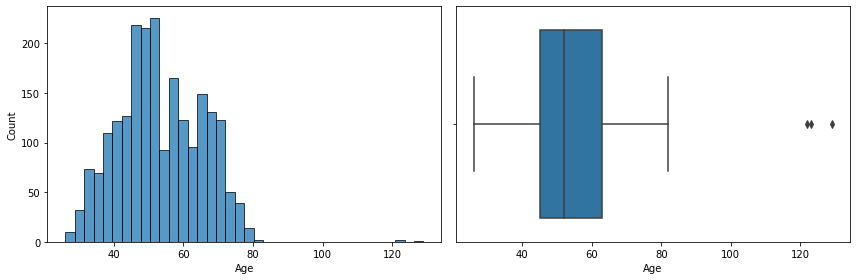

In [168]:
# plot Age
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
sns.histplot(x = "Age", data=data, ax=ax[0])
sns.boxplot(x="Age", data=data, ax=ax[1])
plt.tight_layout()
plt.show()

It seems unlikely that customers with an age of ~ 100+ years old would be alive and buying their own groceries.

The boxplot show us that there are a few outliers.

In [169]:
box_max = get_upper_max('Age')
print("The max value is:", box_max)
data[data['Age'] >= box_max]

The max value is: 90.0


,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
513,2n Cycle,Single,60182.0,0,1,5/17/14,23,8,0,5,...,4,0,0,0,0,0,0,0,SA,129
827,PhD,Couple,83532.0,0,0,9/26/13,36,755,144,562,...,1,0,0,1,0,0,0,0,SP,123
2233,2n Cycle,Divorced,36640.0,1,0,9/26/13,99,15,6,8,...,5,0,0,0,0,0,0,1,IND,122


The 3 age outliers are over 90 years old. They will be kept.

### Feature Engineering

Create additional new features from existing features.

In [170]:
# create dependents feature for kid and teen at home
data['Dependents'] = data['Kidhome'] + data['Teenhome']

# what is the total amount of money spent on food products at the store
data['Total_Food'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] \
    + data['MntFishProducts'] + data['MntSweetProducts']

# Calculate the total number of purchases made
data['Tot_Num_Purchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']

In [171]:
# change Dt_Customer column to a datetime column
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format= '%m/%d/%y')
today = pd.to_datetime("today").strftime('%m-%d-%Y')

def customer_loyalty(df):
    ''' Calculate how long a customer has been part of a loyalty program (in years)'''
    # df['Length_customer'] = pd.to_datetime(dt.date.today()) - df['Dt_Customer']
    df['Length_customer'] = pd.to_datetime(today) - df['Dt_Customer']
    df['Length_customer'] = [float(str(df['Length_customer'][x])[:4]) for x in df.index]
    df['Length_customer'] = round(df['Length_customer']/365,2)
    df.rename(columns = {'Length_customer':'Length_customer_yrs'}, inplace = True)
    df.drop(columns='Dt_Customer', inplace = True)
    return df

customer_loyalty(data)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Dependents,Total_Food,Length_customer_yrs
0,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,...,0,0,0,1,0,SP,52,0,972,8.08
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,...,0,0,1,1,0,CA,61,0,540,8.08
2,Graduation,Couple,67267.0,0,1,0,134,11,59,15,...,0,0,0,0,0,US,64,1,221,8.18
3,Graduation,Couple,32474.0,1,1,0,10,0,1,0,...,0,0,0,0,0,AUS,55,2,11,8.18
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,...,0,0,0,1,0,SP,33,1,57,8.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,PhD,Divorced,66476.0,0,1,99,372,18,126,47,...,0,0,0,0,0,US,46,1,611,9.36
2236,2n Cycle,Couple,31056.0,1,0,99,5,10,13,3,...,0,0,0,0,0,SP,45,1,39,9.48
2237,Graduation,Divorced,46310.0,1,0,99,185,2,88,15,...,0,0,0,0,0,SP,46,1,295,9.62
2238,Graduation,Couple,65819.0,0,0,99,267,38,701,149,...,0,0,0,0,0,IND,44,0,1320,9.63


Text(0.5, 0, 'Total Amount of Money Spent on Food Products')

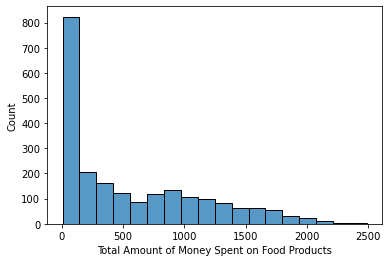

In [192]:
sns.histplot(x ="Total_Food", data=data)
plt.xlabel('Total Amount of Money Spent on Food Products')

<AxesSubplot:xlabel='Tot_Num_Purchases', ylabel='Count'>

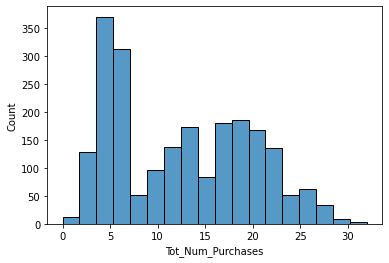

In [174]:
# plot the total number of purchases made
sns.histplot(x ="Tot_Num_Purchases", data=data)
plt.xlabel("Total Number of Purchases Made")

In [175]:
data[data['Tot_Num_Purchases'] == 0]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Dependents,Total_Food,Length_customer_yrs,Tot_Num_Purchases
456,Graduation,Divorced,4861.0,0,0,20,2,1,1,1,...,0,0,0,0,SA,57,0,5,8.07,0
663,PhD,Couple,4023.0,1,1,29,5,0,1,1,...,0,0,0,0,SP,59,2,8,8.06,0
1291,Graduation,Single,3502.0,1,0,56,2,1,1,0,...,0,0,0,0,IND,49,1,4,9.26,0
1466,Graduation,Divorced,1730.0,0,0,65,1,1,3,1,...,0,0,0,0,SP,51,0,7,8.16,0
1826,Graduation,Divorced,153924.0,0,0,81,1,1,1,1,...,0,0,0,0,SP,47,0,5,8.44,0
1925,PhD,Couple,156924.0,0,0,85,2,1,2,1,...,0,0,0,0,CA,73,0,7,8.88,0


In [176]:
len(data[data['Tot_Num_Purchases'] == 0])

6

Looking at the data where the number of purchases are 0 indicates that money was spent by these customers, therefore a purchase was made.

In [177]:
# What is the average number of purchases for customers
data['Tot_Num_Purchases'].replace(0, np.nan, inplace=True)
data['Tot_Num_Purchases'].fillna(data['Tot_Num_Purchases'].mode().iloc[0], inplace=True)
len(data[data['Tot_Num_Purchases'].isna()])

0

### Correlation of Features

Plot a correlation matrix to assess whether nay features are correlated with each other.

<AxesSubplot:>

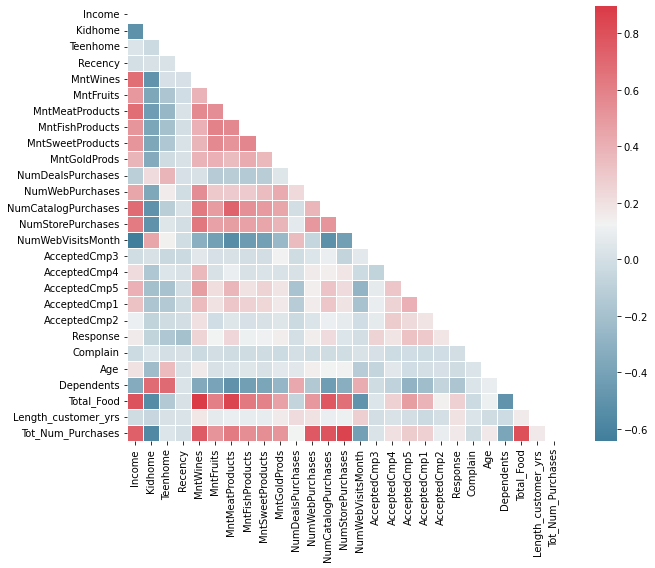

In [178]:
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), mask=mask, cmap= cmap, linewidths= 0.5, square= True)


In [179]:
df_corr = data.corr()
corr_mask = df_corr.mask(np.triu(np.ones_like(df_corr, dtype=np.bool)))
corr_unstacked = corr_mask.unstack().sort_values(ascending = False)
# corr_unstacked

In [195]:
pd.DataFrame(corr_unstacked[corr_unstacked>0.65]).sort_index().style.background_gradient(cmap='coolwarm', low=.6, high=-.5)

In [181]:
pd.DataFrame(corr_unstacked[corr_unstacked< -.5]).sort_index().style.background_gradient(cmap='coolwarm', low=-.6, high=.5)

#### Correlation Results

Income is positively correlated with the features which indicate the amount spent in total and the total number of purchases. Wine and meat products also correlated positively with income.

Having a child at home is negatively correlated with the amount of money being spent and the number of purchases being made at the store (across different channels).

### Distribution of Numeric Variables - Gaussian or not

The Shapiro test is one way of quantifying deviations from normality. Here, it will be used to assess whether numerical features have a Gaussian distribution (normal) or not.

In [182]:
from scipy.stats import shapiro

def shapiro_test(data_col):
    stat, p = shapiro(data_col)
    print('%s : Statistic =%.3f, p=%.5f' % (column, stat, p))
    
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (We fail to reject H0\n)')
    else:
        print('Sample does not look Gaussian (We reject H0)\n')

In [183]:
X = data.select_dtypes(include=np.number).columns.to_list()

column_dict= {elem : pd.DataFrame() for elem in X}
for column in X:
    column_dict[column] = data[column]
    shapiro_test(column_dict[column])

Income : Statistic =0.976, p=0.00000
Sample does not look Gaussian (We reject H0)

Kidhome : Statistic =0.677, p=0.00000
Sample does not look Gaussian (We reject H0)

Teenhome : Statistic =0.695, p=0.00000
Sample does not look Gaussian (We reject H0)

Recency : Statistic =0.954, p=0.00000
Sample does not look Gaussian (We reject H0)

MntWines : Statistic =0.839, p=0.00000
Sample does not look Gaussian (We reject H0)

MntFruits : Statistic =0.689, p=0.00000
Sample does not look Gaussian (We reject H0)

MntMeatProducts : Statistic =0.729, p=0.00000
Sample does not look Gaussian (We reject H0)

MntFishProducts : Statistic =0.707, p=0.00000
Sample does not look Gaussian (We reject H0)

MntSweetProducts : Statistic =0.687, p=0.00000
Sample does not look Gaussian (We reject H0)

MntGoldProds : Statistic =0.767, p=0.00000
Sample does not look Gaussian (We reject H0)

NumDealsPurchases : Statistic =0.739, p=0.00000
Sample does not look Gaussian (We reject H0)

NumWebPurchases : Statistic =0.89

The Shapiro test indicates that the null-hypothesis should be rejected for each feature (none come from a Gaussian distribution).

The variables related to the amount spent and the number of purchases are potentially log normal. Apply a log transform and re-check the to see whether these features have a log-normal distribution.

In [184]:
def get_mnt_cols(df):
    return list(df.filter(regex='Mnt', axis = 1).columns)

col_mnt = get_mnt_cols(data)

In [185]:
def get_purchases_cols(df):
    col_list = df.columns.to_list()
    return [col for col in col_list if 'Purchases' in col]

col_habits = get_purchases_cols(data)

In [186]:
y = col_mnt
y.extend(col_habits)
y.append('NumWebVisitsMonth')

In [187]:
data_log = pd.DataFrame()

for col in y:
    data_log[col] = np.log1p(data[col])

In [188]:
data_log.describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Tot_Num_Purchases,NumWebVisitsMonth
count,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000
mean,4.675475,2.240583,4.128289,2.531766,2.240774,3.123288,1.079144,1.479507,1.006227,1.799844,2.442007,1.751306
std,1.803861,1.565947,1.562109,1.657852,1.593024,1.290158,0.469930,0.562325,0.770149,0.487207,0.601682,0.464284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000
25%,3.208670,1.098612,2.833213,1.386294,0.693147,2.302585,0.693147,1.098612,0.000000,1.386294,1.945910,1.386294
50%,5.167635,2.197225,4.226807,2.564949,2.197225,3.218876,1.098612,1.609438,1.098612,1.791759,2.564949,1.945910
75%,6.226537,3.526361,5.443498,3.931826,3.533607,4.047399,1.386294,1.945910,1.609438,2.197225,2.944439,2.079442
max,7.309212,5.298317,7.453562,5.560682,5.575949,5.894403,2.772589,3.332205,3.367296,2.639057,3.496508,3.044522


In [189]:
# test if features are log normal
column_dict= {elem : pd.DataFrame() for elem in data_log.columns}
for column in data_log.columns:
    column_dict[column] = data[column]
    shapiro_test(column_dict[column])

MntWines : Statistic =0.839, p=0.00000
Sample does not look Gaussian (We reject H0)

MntFruits : Statistic =0.689, p=0.00000
Sample does not look Gaussian (We reject H0)

MntMeatProducts : Statistic =0.729, p=0.00000
Sample does not look Gaussian (We reject H0)

MntFishProducts : Statistic =0.707, p=0.00000
Sample does not look Gaussian (We reject H0)

MntSweetProducts : Statistic =0.687, p=0.00000
Sample does not look Gaussian (We reject H0)

MntGoldProds : Statistic =0.767, p=0.00000
Sample does not look Gaussian (We reject H0)

NumDealsPurchases : Statistic =0.739, p=0.00000
Sample does not look Gaussian (We reject H0)

NumWebPurchases : Statistic =0.898, p=0.00000
Sample does not look Gaussian (We reject H0)

NumCatalogPurchases : Statistic =0.814, p=0.00000
Sample does not look Gaussian (We reject H0)

NumStorePurchases : Statistic =0.905, p=0.00000
Sample does not look Gaussian (We reject H0)

Tot_Num_Purchases : Statistic =0.932, p=0.00000
Sample does not look Gaussian (We rejec

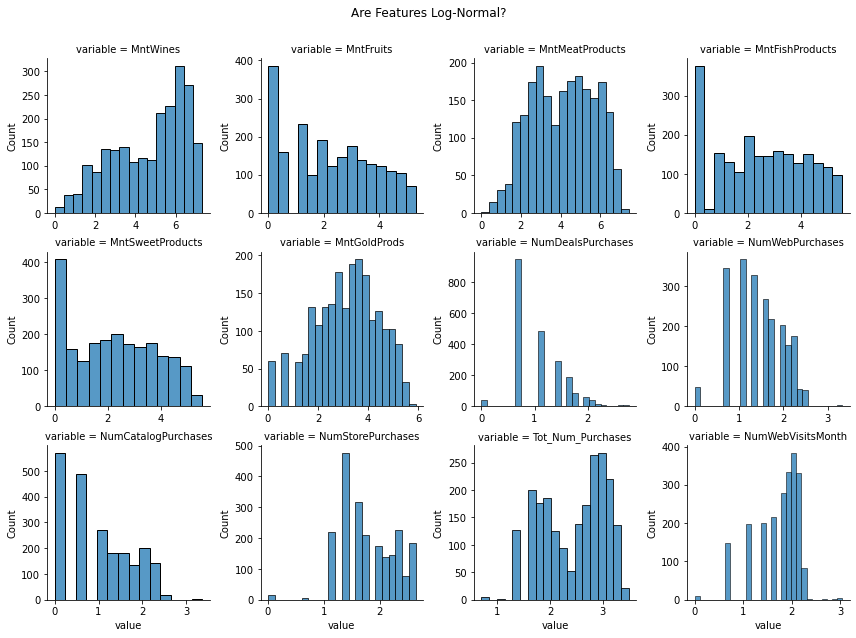

In [190]:
graph = sns.FacetGrid(
    data_log.melt(), 
    col = 'variable', 
    sharey = False, 
    sharex = False,
    col_wrap=4)
graph.map(sns.histplot, "value")
graph.fig.subplots_adjust(top=0.9)
graph.fig.suptitle("Are Features Log-Normal?")
plt.show()

After log transformation, the features were still not considered part of a Gaussian distribution.

## Save File

In [191]:
data.to_csv("processed_data2.csv", index=False)